In [3]:
import pandas as pd

# Load the data from the uploaded CSV file
file_path = '../Data/Processed_Unit.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,...,Max.Heat,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions,CO2.emissions.biogenic.,CO2_eq_emissions,CO2_emissions,CH4_emissions,N2O_emissions,Eco_Score
0,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,...,7.4,176.7,0.0,0.0,0.0,176.7,176.7,0.0,0.0,23.878378
1,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,...,7.4,154.7,0.0,0.0,0.0,154.7,154.7,0.0,0.0,20.905405
2,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec1,...,7.4,84.4,0.0,0.0,0.0,84.4,84.4,0.0,0.0,11.405405
3,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec2,...,7.4,78.9,0.0,0.0,0.0,78.9,78.9,0.0,0.0,10.662162
4,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2020,"C,D",Power Plants,Heatec1,...,7.4,90.7,0.0,0.0,0.0,90.7,90.7,0.0,0.0,12.256757


In [9]:
def filter_data(df, city=None, state=None):
    """
    Filter the dataframe based on city and/or state.
    
    Parameters:
    - df: DataFrame containing the data.
    - city: The city to filter by (optional).
    - state: The state to filter by (optional).
    
    Returns:
    - filtered_df: DataFrame filtered by the specified city and/or state.
    """
    if city and state:
        filtered_df = df[(df['City'].str.lower() == city.lower()) & (df['State'].str.lower() == state.lower())]
    elif city:
        filtered_df = df[df['City'].str.lower() == city.lower()]
    elif state:
        filtered_df = df[df['State'].str.lower() == state.lower()]
    else:
        filtered_df = df.copy()  # Return the original DataFrame if no filters are applied
    
    return filtered_df

# Example usage of the function
# Filter by both city and state
filtered_data = filter_data(data, state="NY")
filtered_data.head()


,Facility.Id,FRS.Id,Facility.Name,City,State,Primary.NAICS.Code,Year,Industry.Type,Sector,Unit.Name,...,Max.Heat,CO2.emissions.non.biogenic.,Methane.emissions,Nitrous.Oxide.emissions,CO2.emissions.biogenic.,CO2_eq_emissions,CO2_emissions,CH4_emissions,N2O_emissions,Eco_Score
0,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec1,...,7.4,176.7,0.0,0.0,0.0,176.7,176.7,0.0,0.0,23.878378
1,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2022,"C,D",Power Plants,Heatec2,...,7.4,154.7,0.0,0.0,0.0,154.7,154.7,0.0,0.0,20.905405
2,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec1,...,7.4,84.4,0.0,0.0,0.0,84.4,84.4,0.0,0.0,11.405405
3,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2021,"C,D",Power Plants,Heatec2,...,7.4,78.9,0.0,0.0,0.0,78.9,78.9,0.0,0.0,10.662162
4,1000112,1.100000e+11,23rd and 3rd,Brooklyn,NY,221112,2020,"C,D",Power Plants,Heatec1,...,7.4,90.7,0.0,0.0,0.0,90.7,90.7,0.0,0.0,12.256757


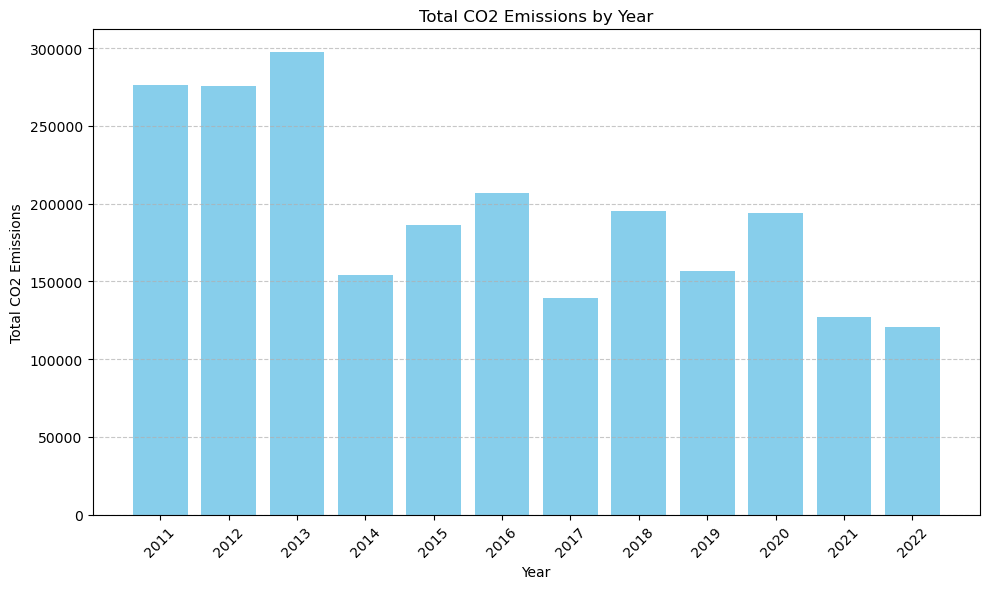

In [5]:
import matplotlib.pyplot as plt

def plot_co2_emissions_by_year(df):
    """
    Plot a bar chart showing the total CO2 emissions by year.
    
    Parameters:
    - df: DataFrame containing the filtered data.
    """
    # Group the data by year and sum the CO2 emissions for each year
    emissions_by_year = df.groupby('Year')['CO2_emissions'].sum().reset_index()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(emissions_by_year['Year'], emissions_by_year['CO2_emissions'], color='skyblue')
    plt.title('Total CO2 Emissions by Year')
    plt.xlabel('Year')
    plt.ylabel('Total CO2 Emissions')
    plt.xticks(emissions_by_year['Year'], rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Adjust layout to not cut off labels
    plt.show()

# Use the function to plot CO2 emissions by year for the filtered data
plot_co2_emissions_by_year(filtered_data)


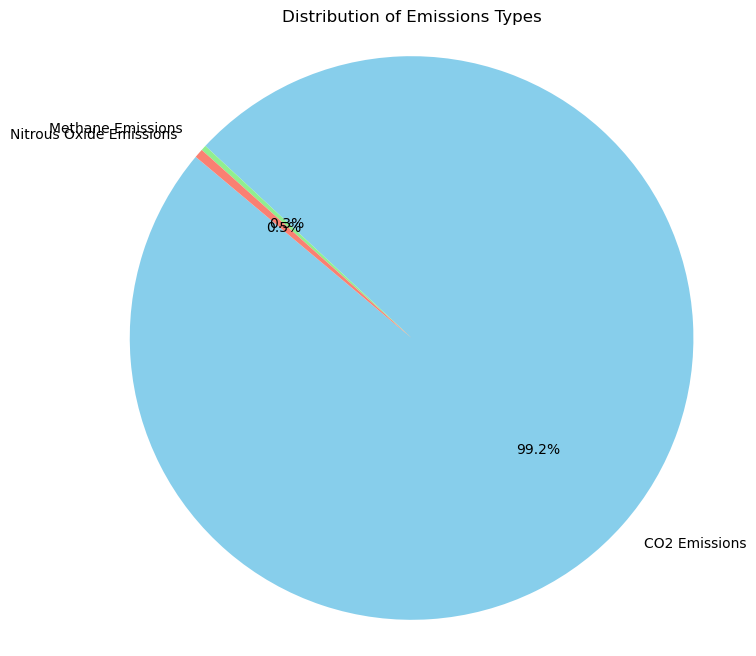

In [10]:
def plot_emissions_distribution(df):
    """
    Plot a pie chart showing the distribution of different types of emissions (CO2, Methane, Nitrous Oxide).
    
    Parameters:
    - df: DataFrame containing the filtered data.
    """
    # Summing up the total emissions for each type
    total_co2 = df['CO2_emissions'].sum()
    total_methane = df['CH4_emissions'].sum()
    total_nitrous_oxide = df['N2O_emissions'].sum()
    
    # Labels and values for the pie chart
    labels = ['CO2 Emissions', 'Methane Emissions', 'Nitrous Oxide Emissions']
    values = [total_co2, total_methane, total_nitrous_oxide]
    
    # Plotting
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'salmon'])
    plt.title('Distribution of Emissions Types')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Use the function to plot the distribution of emissions types for the filtered data
plot_emissions_distribution(filtered_data)


In [11]:
import plotly.express as px

def plot_emissions_by_sector(df):
    """
    Plot a sunburst chart showing the breakdown of emissions by sector.
    
    Parameters:
    - df: DataFrame containing the filtered data.
    """
    # Aggregate the emissions by sector
    emissions_by_sector = df.groupby('Sector')['CO2_emissions'].sum().reset_index()
    
    # Plotting
    fig = px.sunburst(emissions_by_sector, path=['Sector'], values='CO2_emissions',
                      color='CO2_emissions', hover_data=['Sector'],
                      color_continuous_scale='RdBu',
                      title='Emissions Breakdown by Sector')
    fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
    fig.show()

# Use the function to plot emissions breakdown by sector for the filtered data
plot_emissions_by_sector(filtered_data)


In [12]:
def plot_dynamic_scatter(df):
    """
    Create a dynamic scatter plot comparing CO2 emissions and N2O emissions,
    with points color-coded by Sector.
    
    Parameters:
    - df: DataFrame containing the filtered data.
    """
    fig = px.scatter(df, x='CO2_emissions', y='N2O_emissions',
                     color='Sector', hover_data=['Facility.Name', 'City', 'State'],
                     title='CO2 vs. N2O Emissions by Sector',
                     labels={'CO2_emissions': 'CO2 Emissions', 'N2O_emissions': 'Nitrous Oxide Emissions'})
    
    # Enhance the layout
    fig.update_layout(coloraxis_colorbar=dict(title="Sector"),
                      xaxis_title="CO2 Emissions",
                      yaxis_title="Nitrous Oxide Emissions")
    fig.show()

# Use the function to plot a dynamic scatter plot for the filtered data
plot_dynamic_scatter(filtered_data)
